In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def func(x):
    return np.sin(x) + np.sin(2 * x) + np.sin(8 * x)

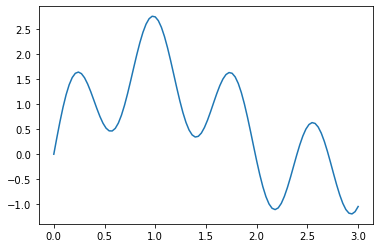

In [117]:
x = np.linspace(0, 3, 100)
y = func(x)
plt.plot(x, y)

In [89]:
def gauss(x, c):
    return np.exp(-np.square(x/c))


def compute_radial_weights(x, y, c = 1):
    xv, yv = np.meshgrid(x, x)
    sig = xv - yv
    sig = gauss(sig, c)
    return np.linalg.solve(sig, y)


def compute_radial_model(x, weights, sample_x, c=1):
    xv, yv = np.meshgrid(x, sample_x)
    sig = xv - yv
    sig = gauss(sig, c)
    sig = np.multiply(sig, weights[:, np.newaxis])
    return np.sum(sig, axis=0)

In [125]:
def calc_error(y, y_hat):
    return np.sum(np.square(y[::5] - y_hat[::5]))

In [126]:
def grid_search(sample_x, sample_y, x, y):
    r_vals = np.exp2(np.arange(-2, 2, 0.1))
    best = None
    best_r = None
    for r in r_vals:
        weights = compute_radial_weights(sample_x, sample_y, r)
        y_hat = compute_radial_model(x, weights, sample_x, r)
        error = calc_error(y, y_hat)
        if best is None or error < best:
            best = error
            best_r = r
    return best_r

In [127]:
# Confirm compute radial works
compute_radial_weights(np.array([1, 2, 3]), np.array([5, 2, 3]), 1)

array([ 5.38468776, -1.21234565,  3.34737304])

In [132]:
np.random.seed(5)
sample_x = np.random.choice(x, 10)
sample_y = func(sample_x)

In [133]:
r = grid_search(sample_x, sample_y, x, y)
print(r)

0.2679433656340733


Error 0.9848420593619739


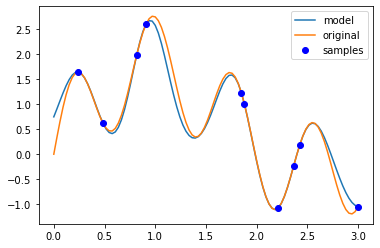

In [134]:
weights = compute_radial_weights(sample_x, sample_y, r)
y_hat = compute_radial_model(x, weights, sample_x, r)
plt.plot(x, y_hat, label="model")
plt.plot(x, y, label="original")
plt.plot(sample_x, sample_y, 'bo', label="samples")
plt.legend()
print("Error", calc_error(y, y_hat))